# upload dataset


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the CSV file with a relative path
df = pd.read_csv('../data/raw/combined_itineraries.csv', low_memory=False)


# basic info

In [49]:
# Display the first few rows to confirm successful pload
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,ac4c9f2477a8bbad61ef1f125074a8c8,2022-05-11,2022-05-13,OAK,ATL,PT6H38M,False,False,False,317.60,...,1652472000||1652491200,2022-05-13T13:00:00.000-07:00||2022-05-13T21:2...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,4680||15600,338||1943,coach||coach
1,8d2669bd137dbf9bd028b9efad164b1a,2022-05-11,2022-05-13,OAK,ATL,PT6H17M,False,False,False,379.58,...,1652506140||1652523180,2022-05-13T22:29:00.000-07:00||2022-05-14T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5580||13980,None||None,coach||coach
2,9dddcfcc0d457d02153b9e084f0f10e3,2022-05-11,2022-05-13,OAK,ATL,PT6H15M,False,False,False,463.58,...,1652462280||1652479860,2022-05-13T10:18:00.000-07:00||2022-05-13T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,4920||15600,None||None,coach||coach
3,bfb49b7de334caa506b1e889e620036e,2022-05-11,2022-05-13,OAK,ATL,PT9H6M,False,False,False,463.58,...,1652452020||1652479860,2022-05-13T07:27:00.000-07:00||2022-05-13T18:1...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...,4920||15600,None||None,coach||coach
4,4209e0b6a2eab5cd0d2a72bd1d34261a,2022-05-11,2022-05-13,OAK,ATL,PT14H13M,False,False,False,463.58,...,1652477460||1652523180,2022-05-13T14:31:00.000-07:00||2022-05-14T06:1...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,AIRBUS INDUSTRIE A320 SHARKLETS||Airbus A319,5460||13980,None||None,coach||coach


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519999 entries, 0 to 13519998
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   legId                              object 
 1   searchDate                         object 
 2   flightDate                         object 
 3   startingAirport                    object 
 4   destinationAirport                 object 
 5   travelDuration                     object 
 6   isBasicEconomy                     bool   
 7   isRefundable                       bool   
 8   isNonStop                          bool   
 9   totalFare                          float64
 10  totalTravelDistance                float64
 11  segmentsDepartureTimeEpochSeconds  object 
 12  segmentsDepartureTimeRaw           object 
 13  segmentsArrivalTimeEpochSeconds    object 
 14  segmentsArrivalTimeRaw             object 
 15  segmentsArrivalAirportCode         object 
 16  segmentsDepartur

In [51]:
print(df.isnull().sum())

legId                                     0
searchDate                                0
flightDate                                0
startingAirport                           0
destinationAirport                        0
travelDuration                            0
isBasicEconomy                            0
isRefundable                              0
isNonStop                                 0
totalFare                                 0
totalTravelDistance                  959619
segmentsDepartureTimeEpochSeconds         0
segmentsDepartureTimeRaw                  0
segmentsArrivalTimeEpochSeconds           0
segmentsArrivalTimeRaw                    0
segmentsArrivalAirportCode                0
segmentsDepartureAirportCode              0
segmentsAirlineName                       0
segmentsAirlineCode                       0
segmentsEquipmentDescription         262676
segmentsDurationInSeconds                 0
segmentsDistance                     126985
segmentsCabinCode               

In [52]:
df.describe()

,totalFare,totalTravelDistance
count,1.352000e+07,1.256038e+07
mean,3.737535e+02,1.569619e+03
std,2.075496e+02,8.414888e+02
min,2.397000e+01,9.700000e+01
25%,2.235800e+02,8.620000e+02
50%,3.446000e+02,1.392000e+03
75%,4.876000e+02,2.376000e+03
max,8.260610e+03,4.430000e+03


In [53]:
unique_cabin_types = df['segmentsCabinCode'].unique()
print(unique_cabin_types)

['coach||coach' 'coach||coach||coach' 'coach' 'business||coach||coach'
 'coach||business||coach' 'coach||business' 'first||first||coach'
 'coach||business||business' 'coach||coach||coach||coach'
 'coach||coach||premium coach' 'first||coach||first' 'business||coach'
 'first||first||first' 'coach||premium coach||premium coach'
 'coach||premium coach||coach' 'coach||first||coach' 'coach||first||first'
 'coach||coach||first' 'business||business' 'first||coach||coach'
 'first||coach' 'first||first' 'coach||premium coach'
 'coach||coach||business' 'premium coach' 'business||business||coach'
 'coach||first' 'business||coach||business' 'first'
 'coach||coach||coach||premium coach' 'premium coach||coach' 'business'
 'premium coach||coach||coach' 'premium coach||premium coach'
 'first||coach||business' 'coach||coach||coach||first'
 'premium coach||premium coach||coach'
 'premium coach||premium coach||premium coach' 'first||business'
 'first||coach||coach||coach' 'first||first||coach||coach'
 'pr

# processing dataset

In [54]:
df_copy = df.copy()


In [55]:
df_copy = df_copy[['startingAirport', 'destinationAirport', 'flightDate', 'segmentsDepartureTimeRaw', 'segmentsCabinCode', 'isNonStop', 'isRefundable', 'totalFare']]


In [56]:
df_copy.head()

,startingAirport,destinationAirport,flightDate,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,isRefundable,totalFare
0,OAK,ATL,2022-05-13,2022-05-13T11:42:00.000-07:00||2022-05-13T14:0...,coach||coach,False,False,317.60
1,OAK,ATL,2022-05-13,2022-05-13T20:56:00.000-07:00||2022-05-13T23:2...,coach||coach,False,False,379.58
2,OAK,ATL,2022-05-13,2022-05-13T08:56:00.000-07:00||2022-05-13T10:5...,coach||coach,False,False,463.58
3,OAK,ATL,2022-05-13,2022-05-13T06:05:00.000-07:00||2022-05-13T10:5...,coach||coach,False,False,463.58
4,OAK,ATL,2022-05-13,2022-05-13T13:00:00.000-07:00||2022-05-13T23:2...,coach||coach,False,False,463.58


In [57]:
df_copy['segmentsDepartureTimeRaw'] = df_copy['segmentsDepartureTimeRaw'].apply(lambda x: x.split('||')[0] if '||' in str(x) else x)
df_copy['segmentsCabinCode'] = df_copy['segmentsCabinCode'].apply(lambda x: x.split('||')[0] if '||' in str(x) else x)

In [58]:
df_copy.head()

,startingAirport,destinationAirport,flightDate,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,isRefundable,totalFare
0,OAK,ATL,2022-05-13,2022-05-13T11:42:00.000-07:00,coach,False,False,317.60
1,OAK,ATL,2022-05-13,2022-05-13T20:56:00.000-07:00,coach,False,False,379.58
2,OAK,ATL,2022-05-13,2022-05-13T08:56:00.000-07:00,coach,False,False,463.58
3,OAK,ATL,2022-05-13,2022-05-13T06:05:00.000-07:00,coach,False,False,463.58
4,OAK,ATL,2022-05-13,2022-05-13T13:00:00.000-07:00,coach,False,False,463.58


In [59]:
df_copy['isNonStop'] = df_copy['isNonStop'].astype(int)
df_copy['isRefundable'] = df_copy['isRefundable'].astype(int)


In [60]:
df_copy.head()

,startingAirport,destinationAirport,flightDate,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,isRefundable,totalFare
0,OAK,ATL,2022-05-13,2022-05-13T11:42:00.000-07:00,coach,0,0,317.60
1,OAK,ATL,2022-05-13,2022-05-13T20:56:00.000-07:00,coach,0,0,379.58
2,OAK,ATL,2022-05-13,2022-05-13T08:56:00.000-07:00,coach,0,0,463.58
3,OAK,ATL,2022-05-13,2022-05-13T06:05:00.000-07:00,coach,0,0,463.58
4,OAK,ATL,2022-05-13,2022-05-13T13:00:00.000-07:00,coach,0,0,463.58


In [61]:
# Step 1: Generate label mappings for `startingAirport` and `destinationAirport`
unique_starting_airports = df_copy['startingAirport'].unique()
unique_destination_airports = df_copy['destinationAirport'].unique()

starting_airport_mapping = {code: idx for idx, code in enumerate(unique_starting_airports)}
destination_airport_mapping = {code: idx for idx, code in enumerate(unique_destination_airports)}

In [62]:
starting_airport_mapping

{'OAK': 0,
 'DEN': 1,
 'LGA': 2,
 'LAX': 3,
 'ATL': 4,
 'CLT': 5,
 'PHL': 6,
 'DTW': 7,
 'IAD': 8,
 'JFK': 9,
 'DFW': 10,
 'BOS': 11,
 'EWR': 12,
 'SFO': 13,
 'ORD': 14,
 'MIA': 15}

In [63]:
destination_airport_mapping

{'ATL': 0,
 'BOS': 1,
 'CLT': 2,
 'DEN': 3,
 'DFW': 4,
 'DTW': 5,
 'EWR': 6,
 'IAD': 7,
 'JFK': 8,
 'LAX': 9,
 'LGA': 10,
 'MIA': 11,
 'ORD': 12,
 'PHL': 13,
 'SFO': 14,
 'OAK': 15}

## label mappings and encoding

In [64]:
import joblib

# Define the consistent mapping for both starting and destination airports
airport_mapping = {
    'ATL': 0, 'BOS': 1, 'CLT': 2, 'DEN': 3, 'DFW': 4, 'DTW': 5, 
    'EWR': 6, 'IAD': 7, 'JFK': 8, 'LAX': 9, 'LGA': 10, 'MIA': 11, 
    'OAK': 12, 'ORD': 13, 'PHL': 14, 'SFO': 15
}

In [65]:
# Apply the mapping to both columns in df_copy
df_copy['startingAirport'] = df_copy['startingAirport'].map(airport_mapping)
df_copy['destinationAirport'] = df_copy['destinationAirport'].map(airport_mapping)

In [66]:
# Display to check the result
print(df_copy[['startingAirport', 'destinationAirport']].head(20))

    startingAirport  destinationAirport
0                12                   0
1                12                   0
2                12                   0
3                12                   0
4                12                   0
5                12                   0
6                12                   0
7                12                   0
8                12                   0
9                12                   0
10               12                   0
11               12                   0
12               12                   0
13               12                   0
14               12                   0
15               12                   0
16               12                   0
17               12                   0
18               12                   0
19               12                   1


In [67]:
# Save the mappings as a joblib file for FastAPI usage
label_mappings = {
    'startingAirport': airport_mapping,
    'destinationAirport': airport_mapping
}

In [81]:
label_mappings

{'startingAirport': {'ATL': 0,
  'BOS': 1,
  'CLT': 2,
  'DEN': 3,
  'DFW': 4,
  'DTW': 5,
  'EWR': 6,
  'IAD': 7,
  'JFK': 8,
  'LAX': 9,
  'LGA': 10,
  'MIA': 11,
  'OAK': 12,
  'ORD': 13,
  'PHL': 14,
  'SFO': 15},
 'destinationAirport': {'ATL': 0,
  'BOS': 1,
  'CLT': 2,
  'DEN': 3,
  'DFW': 4,
  'DTW': 5,
  'EWR': 6,
  'IAD': 7,
  'JFK': 8,
  'LAX': 9,
  'LGA': 10,
  'MIA': 11,
  'OAK': 12,
  'ORD': 13,
  'PHL': 14,
  'SFO': 15}}

In [70]:
joblib.dump(label_mappings, "../models/mappings/airport_label_mappings.joblib")

['../models/mappings/airport_label_mappings.joblib']

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
cabin_encoder = LabelEncoder()


In [73]:
df_copy['segmentsCabinCode'] = cabin_encoder.fit_transform(df_copy['segmentsCabinCode'])

In [74]:
df_copy.head()

,startingAirport,destinationAirport,flightDate,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,isRefundable,totalFare
0,12,0,2022-05-13,2022-05-13T11:42:00.000-07:00,1,0,0,317.60
1,12,0,2022-05-13,2022-05-13T20:56:00.000-07:00,1,0,0,379.58
2,12,0,2022-05-13,2022-05-13T08:56:00.000-07:00,1,0,0,463.58
3,12,0,2022-05-13,2022-05-13T06:05:00.000-07:00,1,0,0,463.58
4,12,0,2022-05-13,2022-05-13T13:00:00.000-07:00,1,0,0,463.58


In [75]:
df_copy['segmentsCabinCode'].unique()

array([1, 0, 2, 3])

In [131]:
print(cabin_encoder)

LabelEncoder()


In [76]:
joblib.dump(cabin_encoder, '../models/mappings/segmentsCabinCode_encoder.joblib')

['../models/mappings/segmentsCabinCode_encoder.joblib']

## feature engineering

In [78]:
import pytz

# Convert flightDate to datetime and extract day, month, and year
df_copy["flightDate"] = pd.to_datetime(df_copy["flightDate"])
df_copy["flightDay"] = df_copy["flightDate"].dt.day
df_copy["flightMonth"] = df_copy["flightDate"].dt.month
df_copy["flightYear"] = df_copy["flightDate"].dt.year

# Convert to datetime and then set to Sydney time
df_copy["segmentsDepartureTimeRaw"] = pd.to_datetime(df_copy["segmentsDepartureTimeRaw"], utc=True)
df_copy["segmentsDepartureTimeRaw"] = df_copy["segmentsDepartureTimeRaw"].dt.tz_convert('Australia/Sydney')

# Extract hour and minute in Sydney time
df_copy["departureHour"] = df_copy["segmentsDepartureTimeRaw"].dt.hour
df_copy["departureMinute"] = df_copy["segmentsDepartureTimeRaw"].dt.minute


# The dataset is now clean, fully numeric, and ready for modeling.
df_copy.head()


,startingAirport,destinationAirport,flightDate,segmentsDepartureTimeRaw,segmentsCabinCode,isNonStop,isRefundable,totalFare,flightDay,flightMonth,departureHour,departureMinute,flightYear
0,12,0,2022-05-13,2022-05-14 04:42:00+10:00,1,0,0,317.60,13,5,4,42,2022
1,12,0,2022-05-13,2022-05-14 13:56:00+10:00,1,0,0,379.58,13,5,13,56,2022
2,12,0,2022-05-13,2022-05-14 01:56:00+10:00,1,0,0,463.58,13,5,1,56,2022
3,12,0,2022-05-13,2022-05-13 23:05:00+10:00,1,0,0,463.58,13,5,23,5,2022
4,12,0,2022-05-13,2022-05-14 06:00:00+10:00,1,0,0,463.58,13,5,6,0,2022


In [128]:
df_copy.head()

,startingAirport,destinationAirport,segmentsCabinCode,isNonStop,totalFare,flightDay,flightMonth,departureHour,departureMinute,flightYear
0,12,0,1,0,317.60,13,5,4,42,2022
1,12,0,1,0,379.58,13,5,13,56,2022
2,12,0,1,0,463.58,13,5,1,56,2022
3,12,0,1,0,463.58,13,5,23,5,2022
4,12,0,1,0,463.58,13,5,6,0,2022


In [79]:
df_copy.drop(columns=["flightDate"], inplace=True)  # Drop original date column after extraction

In [80]:
df_copy.drop(columns=["segmentsDepartureTimeRaw"], inplace=True)  # Drop the original time column

In [83]:
df_copy['isRefundable'].unique()

array([0, 1])

In [84]:
# Calculating counts and percentages
counts = df_copy['isRefundable'].value_counts()
percentages = df_copy['isRefundable'].value_counts(normalize=True) * 100

# Creating a DataFrame to display the results
results = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

print(results)


                 Count  Percentage
isRefundable                      
0             13519808   99.998587
1                  191    0.001413


In [86]:
df_copy.drop(columns=["isRefundable"], inplace=True)  

In [85]:
# Calculating counts and percentages
counts = df_copy['isNonStop'].value_counts()
percentages = df_copy['isNonStop'].value_counts(normalize=True) * 100

# Creating a DataFrame to display the results
results = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
})

print(results)


             Count  Percentage
isNonStop                     
0          9564064   70.740124
1          3955935   29.259876


In [87]:
df_copy.head()


,startingAirport,destinationAirport,segmentsCabinCode,isNonStop,totalFare,flightDay,flightMonth,departureHour,departureMinute,flightYear
0,12,0,1,0,317.60,13,5,4,42,2022
1,12,0,1,0,379.58,13,5,13,56,2022
2,12,0,1,0,463.58,13,5,1,56,2022
3,12,0,1,0,463.58,13,5,23,5,2022
4,12,0,1,0,463.58,13,5,6,0,2022


# train and test dataset

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
!pip install lightgbm


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor


In [89]:
# Take a random 30% sample of the dataset
df_sampled = df_copy.sample(frac=0.3, random_state=42)

# Split the sampled data into training and test sets
X = df_sampled.drop(columns=["totalFare"])
y = df_sampled["totalFare"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Sampled dataset size: {df_sampled.shape[0]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Sampled dataset size: 4056000
Training set size: 3244800
Test set size: 811200


## check any missing labels

In [124]:
sorted_airports = np.sort(X_train['startingAirport'].unique())
print(sorted_airports)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [126]:
sorted_airports = np.sort(X_train['destinationAirport'].unique())
print(sorted_airports)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [127]:
sorted_airports = np.sort(X_test['destinationAirport'].unique())
print(sorted_airports)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [125]:
sorted_airports = np.sort(X_test['startingAirport'].unique())
print(sorted_airports)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


# training models 

In [99]:
models = {
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "LightGBM": LGBMRegressor(),
    "KNN": KNeighborsRegressor(),
    "ElasticNet": ElasticNet(),
    "XGBoost": XGBRegressor()
}

In [100]:
# Define hyperparameters for each model, including LightGBM with 'force_row_wise' set to True
params = {
    "HistGradientBoosting": {
        "max_iter": [100, 200], 
        "learning_rate": [0.01, 0.1]
    },
    "LightGBM": {
        "num_leaves": [31, 50],
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [100, 200],
        "force_row_wise": [True]  # This forces row-wise threading to avoid the testing overhead
    },
    "KNN": {"n_neighbors": [5, 10, 15], "weights": ["uniform", "distance"]},
    "ElasticNet": {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.1, 0.5, 0.9]},
    "XGBoost": {"max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100, 200]}
}


# hypertuning models


In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


# Dictionary to store best models after tuning
best_models = {}

# Hyperparameter tuning for each model
for model_name in models:
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(
        estimator=models[model_name], 
        param_grid=params[model_name], 
        cv=5, 
        scoring='neg_mean_squared_error'
    )
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    best_mse = abs(grid.best_score_)
    print(f"Best {model_name} params: {grid.best_params_}, MSE: {best_mse:.2f}")


Tuning HistGradientBoosting...
Best HistGradientBoosting params: {'learning_rate': 0.1, 'max_iter': 200}, MSE: 17669.19
Tuning LightGBM...
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 2595840, number of used features: 8
[LightGBM] [Info] Start training from score 373.793889
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 2595840, number of used features: 8
[LightGBM] [Info] Start training from score 373.856173
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 2595840, number of used features: 8
[LightGBM] [Info] Start training from score 373.819348
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 2595840, number of used features: 8
[LightGBM] [Info] Start training from score 373.817123
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 2595840, number of used features: 8
[Light

# Model results

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    print("-" * 30)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# Dictionary to store results for each model
model_results = {}

# Evaluate each tuned model
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)  # Predict on test data
    results = evaluate_model(y_test, y_pred, model_name)
    model_results[model_name] = results

# Display results
print("\nModel Evaluation Results:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: {metrics}")

HistGradientBoosting Performance:
Mean Squared Error (MSE): 17575.2691
Root Mean Squared Error (RMSE): 132.5718
Mean Absolute Error (MAE): 91.4156
R-squared (R²): 0.5938
------------------------------
LightGBM Performance:
Mean Squared Error (MSE): 16392.8342
Root Mean Squared Error (RMSE): 128.0345
Mean Absolute Error (MAE): 87.8773
R-squared (R²): 0.6211
------------------------------
KNN Performance:
Mean Squared Error (MSE): 10580.9889
Root Mean Squared Error (RMSE): 102.8639
Mean Absolute Error (MAE): 55.2001
R-squared (R²): 0.7554
------------------------------
ElasticNet Performance:
Mean Squared Error (MSE): 36433.4171
Root Mean Squared Error (RMSE): 190.8754
Mean Absolute Error (MAE): 138.0749
R-squared (R²): 0.1579
------------------------------
XGBoost Performance:
Mean Squared Error (MSE): 14335.9821
Root Mean Squared Error (RMSE): 119.7330
Mean Absolute Error (MAE): 79.9023
R-squared (R²): 0.6687
------------------------------

Model Evaluation Results:
HistGradientBoostin

In [103]:
# Define your model save path
model_path = "../models/"

# Save each best model to the specified directory
for model_name, model in best_models.items():
    save_path = f"{model_path}{model_name}_best_model.joblib"
    joblib.dump(model, save_path)
    print(f"{model_name} saved to {save_path}")


HistGradientBoosting saved to ../models/HistGradientBoosting_best_model.joblib
LightGBM saved to ../models/LightGBM_best_model.joblib
KNN saved to ../models/KNN_best_model.joblib
ElasticNet saved to ../models/ElasticNet_best_model.joblib
XGBoost saved to ../models/XGBoost_best_model.joblib


In [105]:
if "LightGBM" in best_models:
    # Convert best LightGBM model to its native format for saving as .txt
    lgb_model = best_models["LightGBM"].booster_
    save_path = f"{model_path}LightGBM_best_model.txt"
    lgb_model.save_model(save_path)
    print(f"LightGBM model saved to {save_path} as a .txt file")

LightGBM model saved to ../models/LightGBM_best_model.txt as a .txt file


# model visualizations

HistGradientBoosting does not support feature importances.


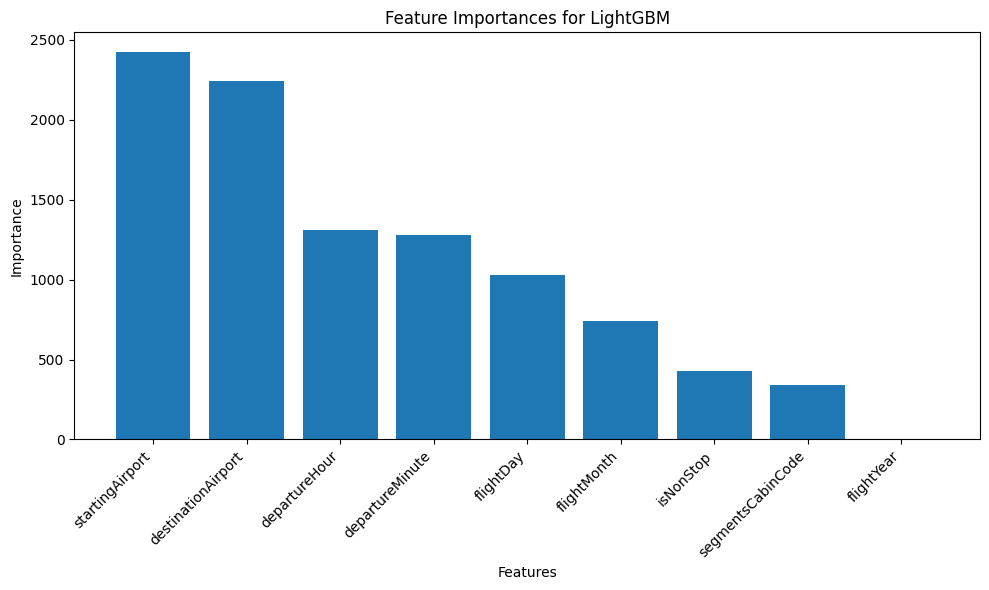

KNN does not support feature importances.
ElasticNet does not support feature importances.


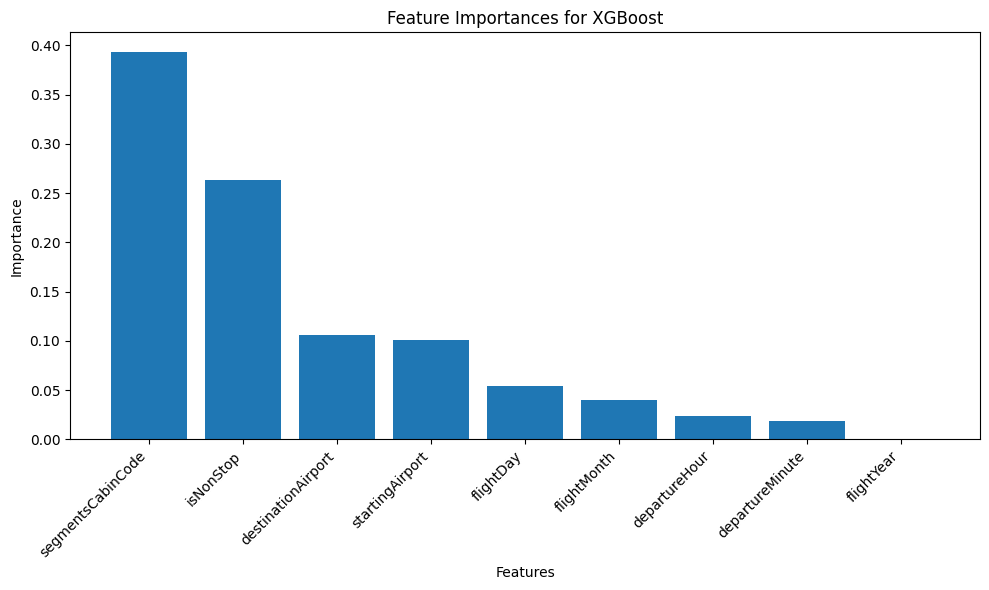

In [116]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names, model_name):
    # Only plot feature importances for models that support it
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = importances.argsort()[::-1]  # Sort features by importance

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importances for {model_name}')
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not support feature importances.")

# Example usage, specifying only models that support feature importance
feature_names = X_train.columns  # Assuming X_train is a DataFrame with named columns

for name, model in best_models.items():
    if name in ["HistGradientBoosting", "LightGBM", "XGBoost"]:  # Models with feature importance
        plot_feature_importance(model, feature_names, name)
    else:
        print(f"{name} does not support feature importances.")


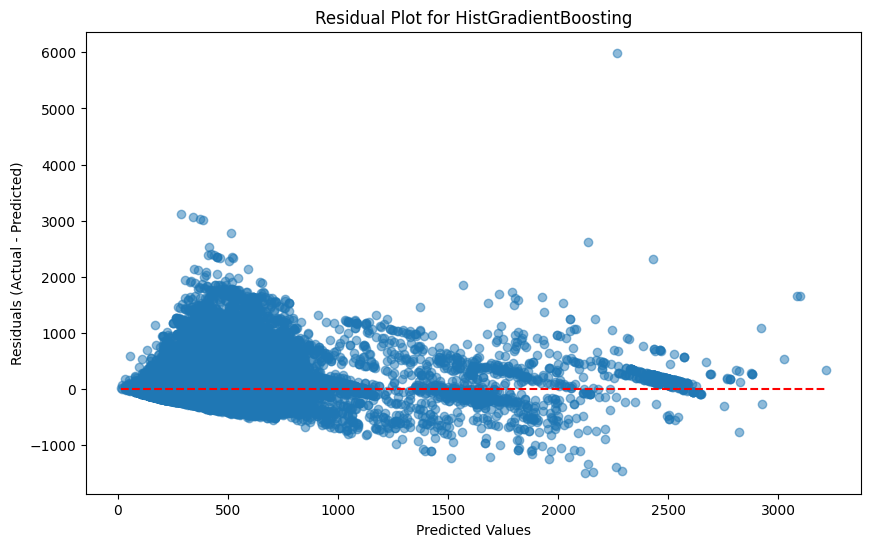

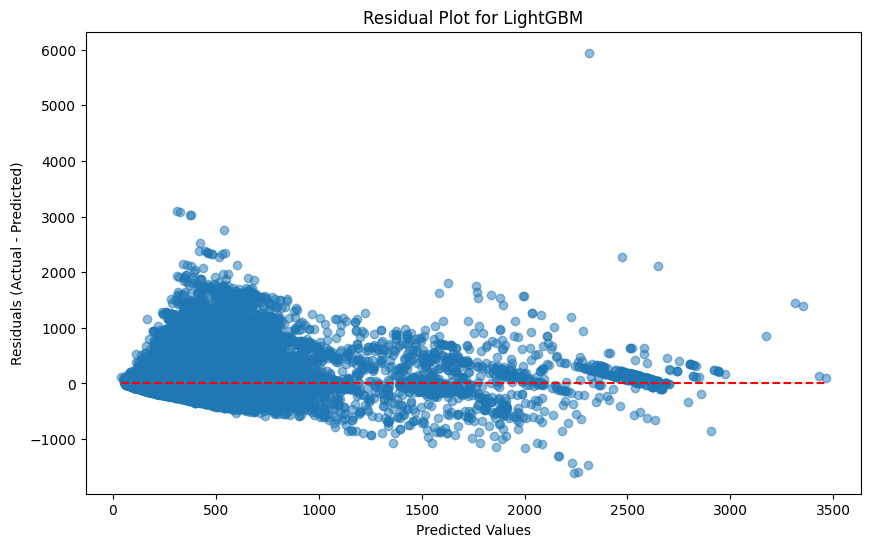

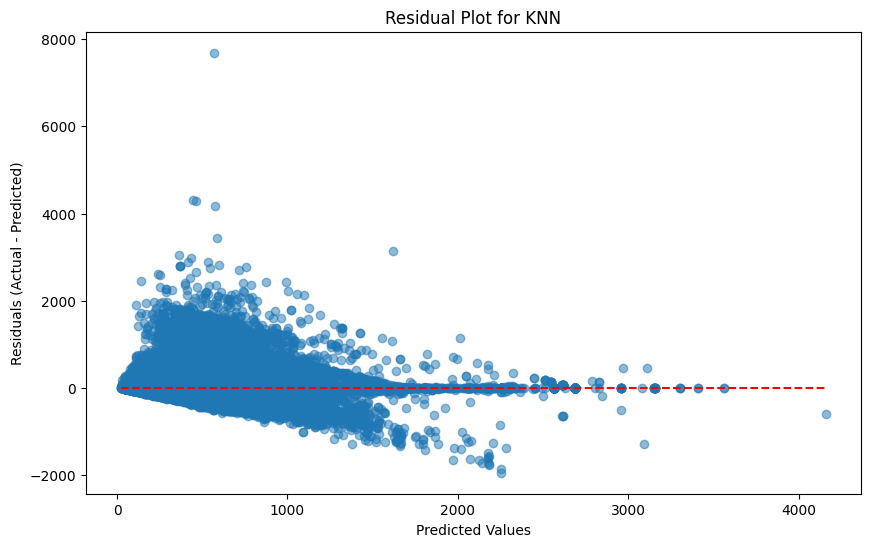

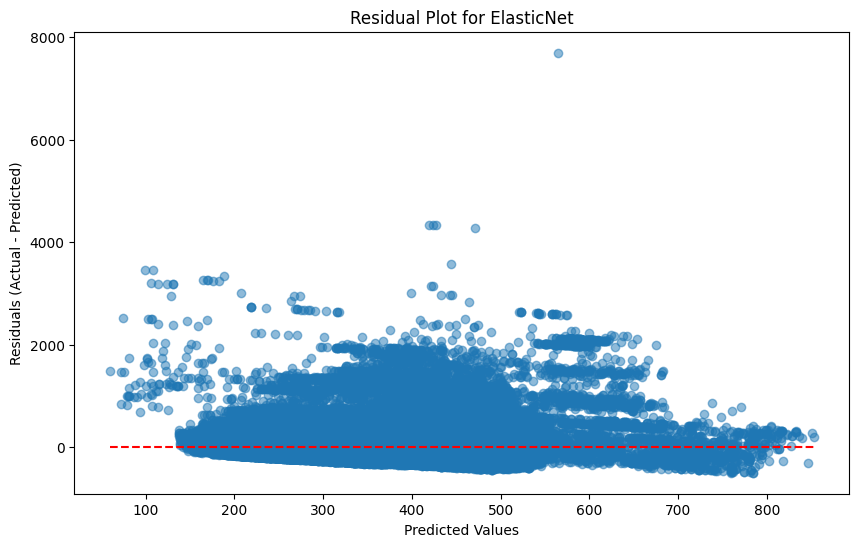

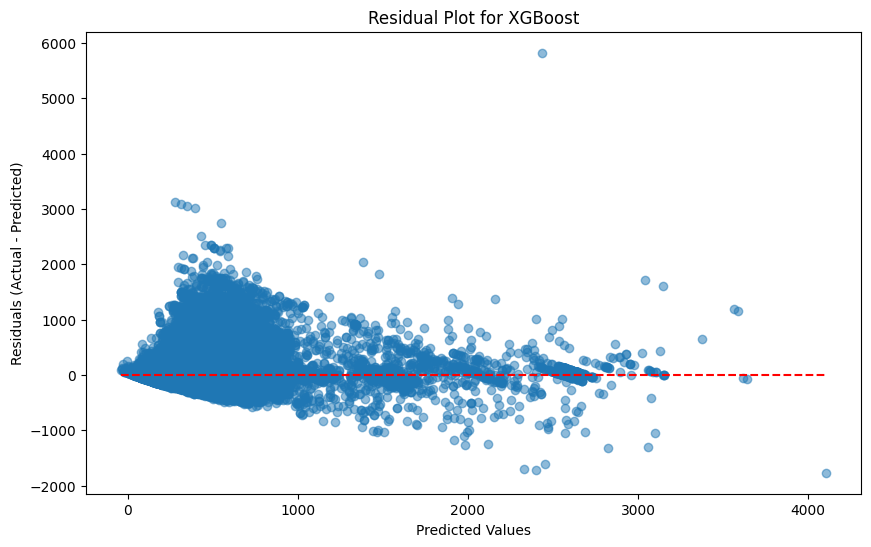

In [117]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.show()

# Example usage
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, name)


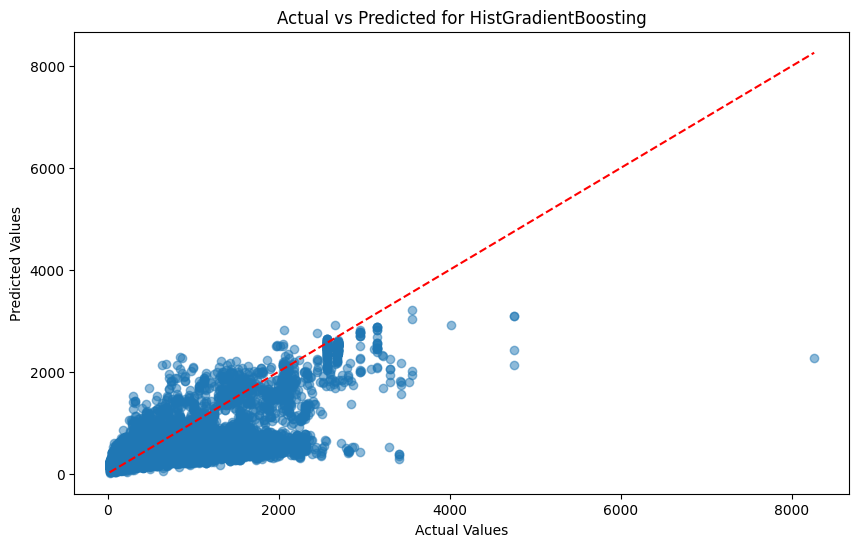

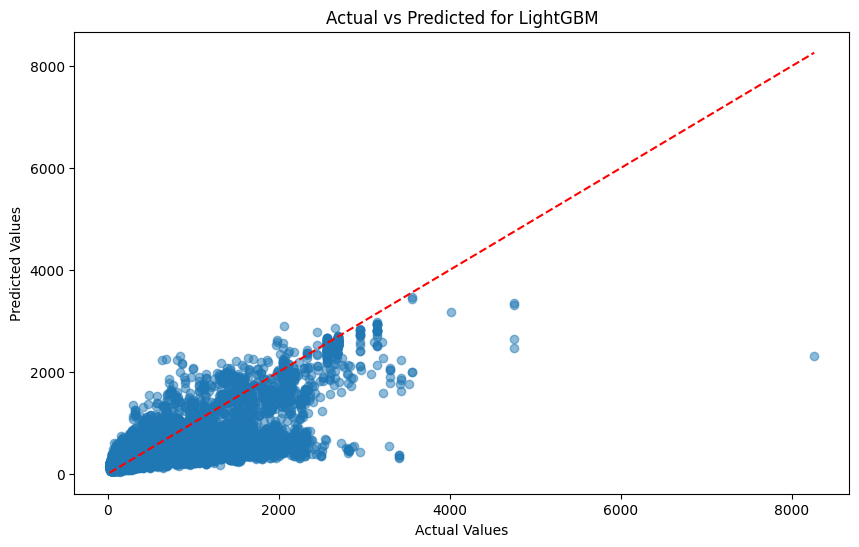

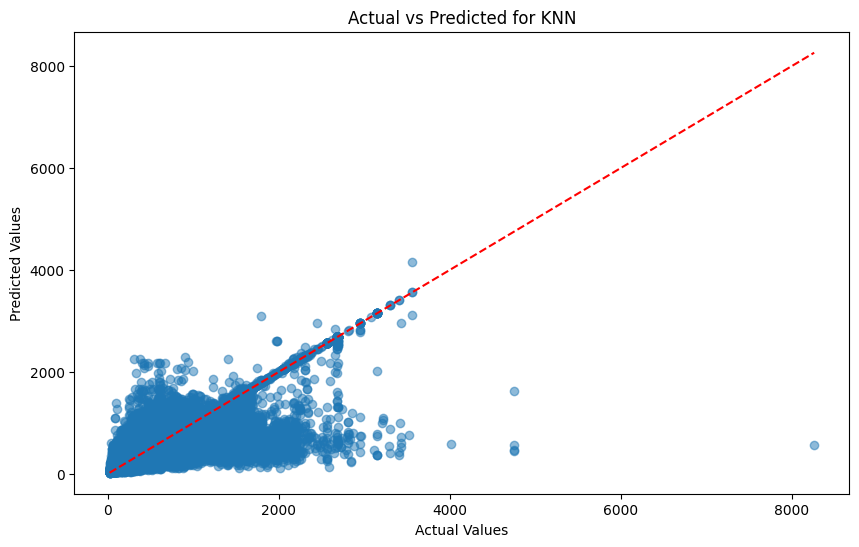

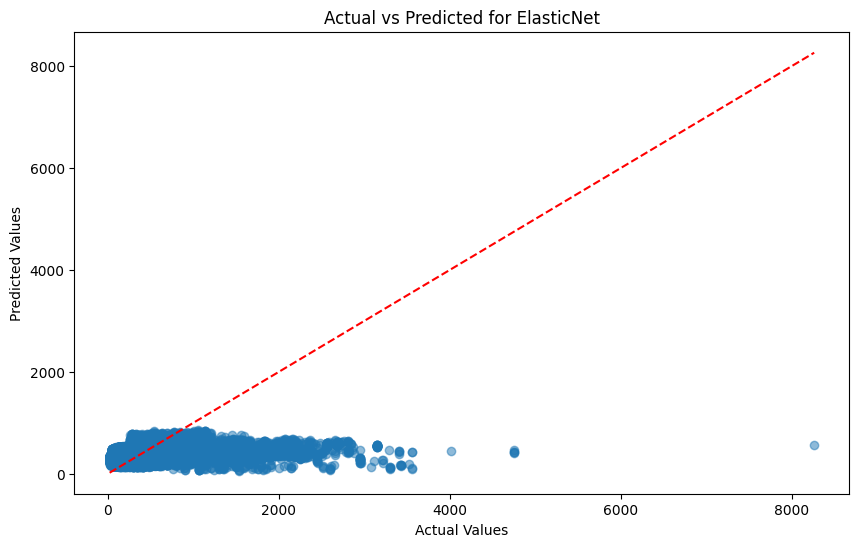

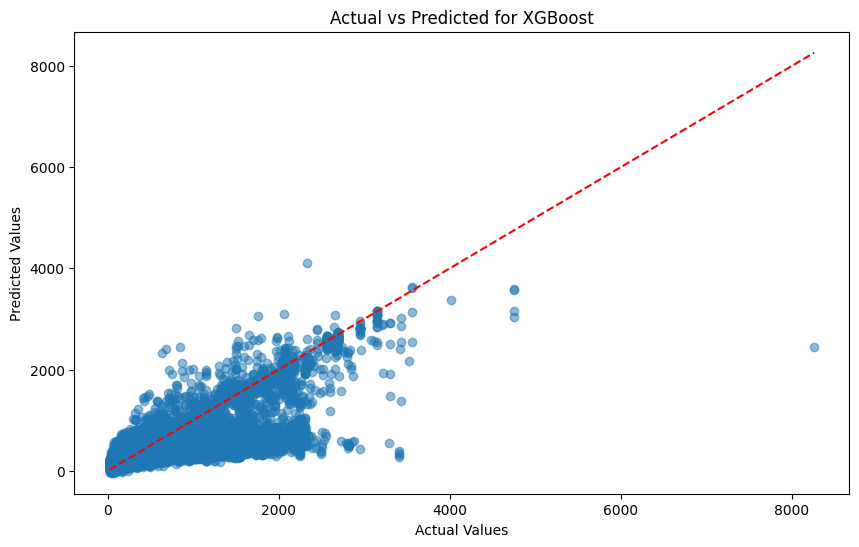

In [118]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()

# Example usage
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    plot_actual_vs_predicted(y_test, y_pred, name)


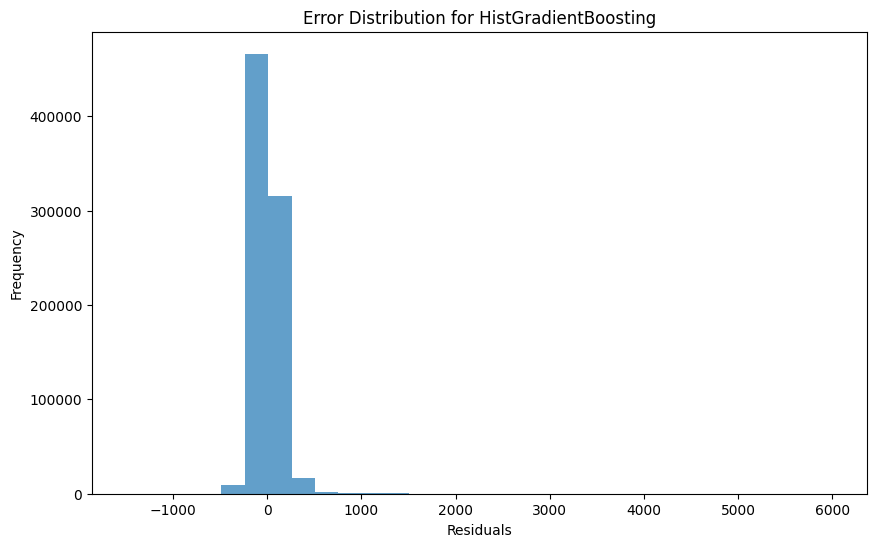

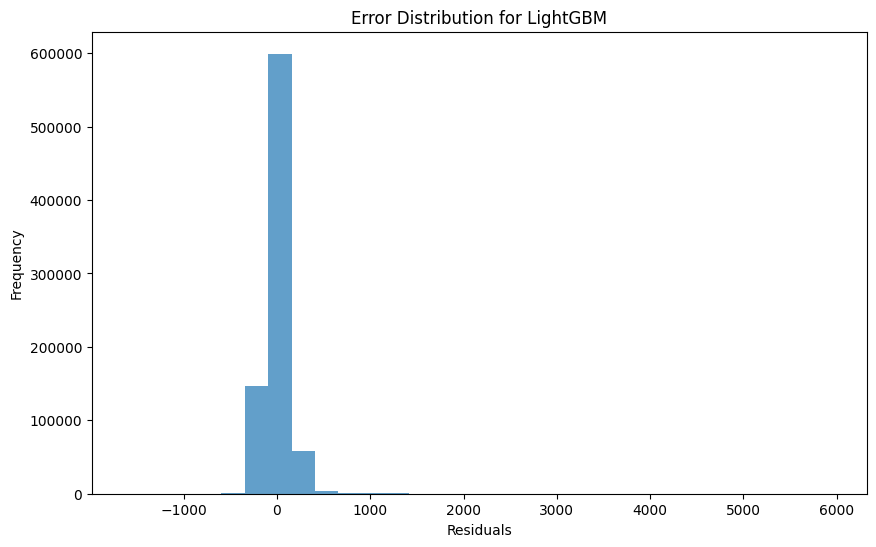

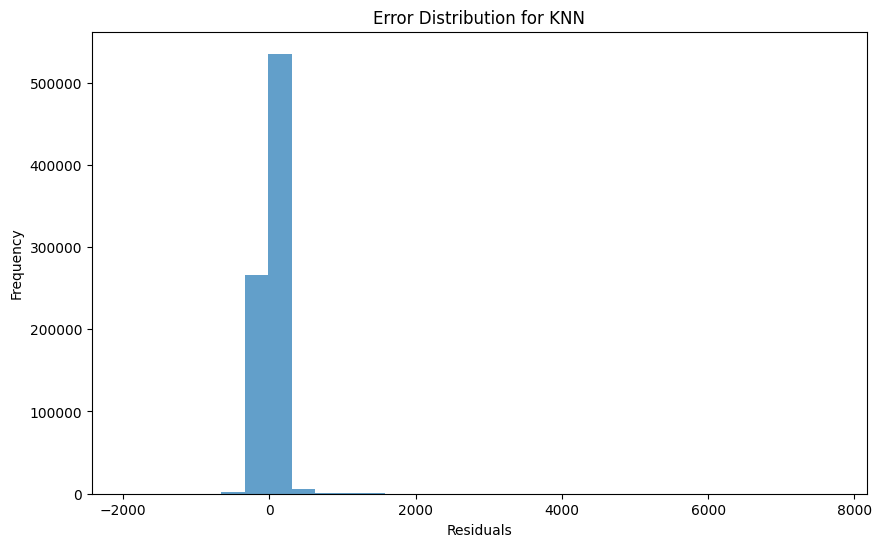

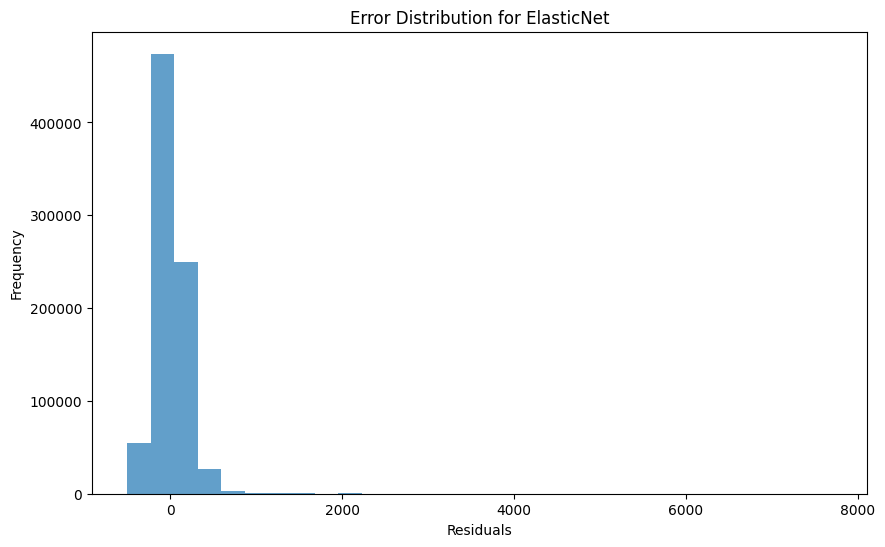

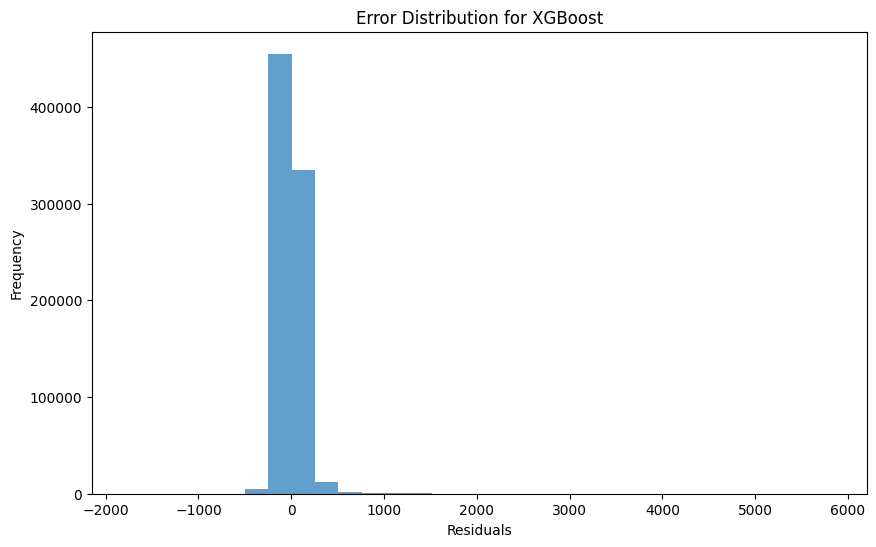

In [119]:
def plot_error_distribution(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30, alpha=0.7)
    plt.title(f'Error Distribution for {model_name}')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

# Example usage
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    plot_error_distribution(y_test, y_pred, name)
